# Processing the data

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('CPU')
# print('CPUs Available: ' ,len(physical_devices))
print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
df = pd.read_csv('/Users/jackkelly/Desktop/Building_Model/Data/40_channels_data_4000.csv')
df.head()

,launch_power_dbm,Status_Ch1,Status_Ch2,Status_Ch3,Status_Ch4,Status_Ch5,Status_Ch6,Status_Ch7,Status_Ch8,Status_Ch9,...,snr_Ch31,snr_Ch32,snr_Ch33,snr_Ch34,snr_Ch35,snr_Ch36,snr_Ch37,snr_Ch38,snr_Ch39,snr_Ch40
0,9.10,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.844896,0.0
1,8.88,0,0,0,0,0,0,0,0,0,...,0.0,0.0,6.187725,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,7.98,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,9.42,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,7.86,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,6.877953,0.0,7.148713,0.000000,0.0


In [4]:
dataset = df.values
# dataset

In [5]:
X = dataset[:,0:41]
# channel SNRs
Y = dataset[:,41:81]

In [6]:
# shuffle necessary because while shuffle=True in .fit() shuffles the data, it splits into different datasets first
X, Y = shuffle(X, Y)

In [7]:
# scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y)

In [8]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2800, 41) (600, 41) (600, 41) (2800, 40) (600, 40) (600, 40)


# Building the ANN

In [10]:
model = Sequential()
model.add(Dense(80, activation='relu', input_dim=41))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                3240      
Total params: 13,080
Trainable params: 13,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
# learning_rate=0.1 causes zig-zags, learning_rate=0.0001 is far too slow
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [12]:
# fit as we are fitting the parameters to the data
# verbose shows how much info is shown during model fitting
# shuffle by default set to true so this is for visual purposes
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, shuffle=True, verbose=1, batch_size=41)

Train on 2800 samples, validate on 600 samples
Epoch 1/50
2800/2800 [==============================] - 1s 237us/step - loss: 0.1611 - mean_squared_error: 0.1611 - mean_absolute_error: 0.3821 - val_loss: 0.1201 - val_mean_squared_error: 0.1201 - val_mean_absolute_error: 0.3011
Epoch 2/50
2800/2800 [==============================] - 0s 67us/step - loss: 0.1012 - mean_squared_error: 0.1012 - mean_absolute_error: 0.2675 - val_loss: 0.0821 - val_mean_squared_error: 0.0821 - val_mean_absolute_error: 0.2399
Epoch 3/50
2800/2800 [==============================] - 0s 63us/step - loss: 0.0667 - mean_squared_error: 0.0667 - mean_absolute_error: 0.2110 - val_loss: 0.0536 - val_mean_squared_error: 0.0536 - val_mean_absolute_error: 0.1859
Epoch 4/50
2800/2800 [==============================] - 0s 60us/step - loss: 0.0432 - mean_squared_error: 0.0432 - mean_absolute_error: 0.1639 - val_loss: 0.0358 - val_mean_squared_error: 0.0358 - val_mean_absolute_error: 0.1473
Epoch 5/50
2800/2800 [==============

2800/2800 [==============================] - 0s 62us/step - loss: 4.9720e-04 - mean_squared_error: 4.9720e-04 - mean_absolute_error: 0.0171 - val_loss: 5.1297e-04 - val_mean_squared_error: 5.1297e-04 - val_mean_absolute_error: 0.0173
Epoch 36/50
2800/2800 [==============================] - 0s 60us/step - loss: 8.1270e-04 - mean_squared_error: 8.1270e-04 - mean_absolute_error: 0.0211 - val_loss: 8.1295e-04 - val_mean_squared_error: 8.1295e-04 - val_mean_absolute_error: 0.0199
Epoch 37/50
2800/2800 [==============================] - 0s 59us/step - loss: 4.8800e-04 - mean_squared_error: 4.8800e-04 - mean_absolute_error: 0.0169 - val_loss: 6.3780e-04 - val_mean_squared_error: 6.3780e-04 - val_mean_absolute_error: 0.0207
Epoch 38/50
2800/2800 [==============================] - 0s 57us/step - loss: 4.7399e-04 - mean_squared_error: 4.7399e-04 - mean_absolute_error: 0.0167 - val_loss: 8.8612e-04 - val_mean_squared_error: 8.8612e-04 - val_mean_absolute_error: 0.0208
Epoch 39/50
2800/2800 [=====

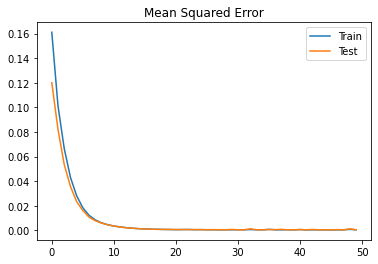

In [13]:
plt.title('Mean Squared Error')
plt.plot(hist.history['mean_squared_error'], label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.legend()
plt.show()

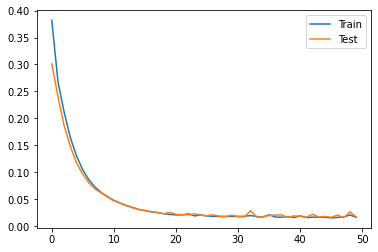

In [14]:
plt.plot(hist.history['mean_absolute_error'], label='Train')
plt.plot(hist.history['val_mean_absolute_error'], label='Test')
plt.legend()
plt.show()

In [15]:
#0 = loss, 1 = accuracy
train_mse = (model.evaluate(X_train, Y_train, verbose=1))[1]
test_mse = (model.evaluate(X_test, Y_test, verbose=1))[1]
val_mse = (model.evaluate(X_val, Y_val, verbose=1))[1]
print('MSE train: %.5f, MSE test: %.5f MSE val: %.5f' % (train_mse, test_mse, val_mse))

600/600 [==============================] - 0s 36us/step
MSE train: 0.00045, MSE test: 0.00049 MSE val: 0.00052


In [16]:
# MSE train: 0.00045, MSE test: 0.00047